# ML Project

> By   Grace Esther D. S.




# About dataset

### Spotify Tracks DB

This dataset, available from [Kaggle](https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db), is a comprehensive collection of tracks from Spotify, containing various metadata and audio features. The data is ideal for music analysis, recommendation systems, or any project involving audio analytics.

#### Dataset Overview:
- **Number of Rows**: 232,725
- **Number of Columns**: 18
- **Source**: Spotify API and other curated data

#### Column Descriptions:
1. **genre**: The genre associated with the track (e.g., Movie, Country, Alternative, and so on).  
2. **artist_name**: Name of the artist or band that performed the track.  
3. **track_name**: Name of the track.  
4. **track_id**: Unique identifier for the track in Spotify's database.  
5. **popularity**: Popularity score of the track, ranging from 0 to 100, where higher values indicate greater popularity.  
6. **acousticness**: A measure of how acoustic a track is, with values ranging from 0.0 to 1.0. Higher values indicate a higher likelihood of the track being acoustic.  
7. **danceability**: A measure of how suitable a track is for dancing, with values ranging from 0.0 to 1.0. Factors include tempo, rhythm stability, and beat strength.  
8. **duration_ms**: Duration of the track in milliseconds.  
9. **energy**: A measure of the track’s intensity and activity, ranging from 0.0 to 1.0. High-energy tracks are typically fast and loud.  
10. **instrumentalness**: Predicts whether a track contains vocals. Values closer to 1.0 indicate higher likelihood of being instrumental.  
11. **key**: The key of the track, represented as an integer (0 = C, 1 = C#, ..., 11 = B).  
12. **liveness**: Detects the presence of an audience in the recording. Higher values indicate a higher probability of the track being recorded live.  
13. **loudness**: The average loudness of the track in decibels (dB). Values are usually negative, where lower values indicate quieter tracks.  
14. **mode**: Indicates the modality of the track, where 1 represents a major key and 0 represents a minor key.  
15. **speechiness**: Detects the presence of spoken words in a track, with values ranging from 0.0 to 1.0. Higher values indicate more speech-like content.  
16. **tempo**: The estimated tempo of the track in beats per minute (BPM).  
17. **time_signature**: An estimated time signature, indicating the number of beats in each bar (e.g., 4 means 4/4 time).  
18. **valence**: A measure describing the musical positiveness of a track, ranging from 0.0 (sad, depressing) to 1.0 (happy, cheerful).  
19. **hit**: A binary label indicating whether the track was a hit (1 = hit, 0 = not a hit).


# Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate, GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.inspection import permutation_importance

# EDA

In [ ]:
data = pd.read_csv('SpotifyFeatures.csv')
# Downsampling due to efficiency
data = data.sample(frac = 0.04, random_state = 42)
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
788,Country,A Thousand Horses,My Time's Comin',16zol4GvHyTER5irYODUk0,45,0.00192,0.327,194107,0.8350,0.000150,C,0.1670,-4.952,Major,0.0609,171.795,4/4,0.3850
207109,Soundtrack,Mark Mothersbaugh,House Tour,6ac5gUfGTckpdGQCyWsdh2,25,0.93200,0.253,102920,0.0798,0.568000,C,0.0906,-18.512,Major,0.0439,110.931,4/4,0.0487
138644,Reggae,Unified Highway,We Can't Fall (Remix) [feat. J. Patz],09Yz6koF1Y15n1012t1UX6,19,0.03310,0.821,225437,0.7370,0.013400,E,0.1320,-6.295,Minor,0.2120,137.968,4/4,0.7870
37164,Electronic,Stooki Sound,Endz - Original Mix,3dzEZARDL4ZwICMKVta7Xn,29,0.00428,0.745,225400,0.7720,0.114000,E,0.0722,-3.949,Major,0.0904,133.113,4/4,0.1700
174351,Comedy,Bill Hicks,I Love My Job (Live),39Z1G5384UgGa5vmW6WyxC,17,0.96500,0.502,287973,0.8040,0.000096,G,0.9020,-9.935,Major,0.8070,104.576,3/4,0.1850


Quick analysis and overview of the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9309 entries, 788 to 98722
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             9309 non-null   object 
 1   artist_name       9309 non-null   object 
 2   track_name        9309 non-null   object 
 3   track_id          9309 non-null   object 
 4   popularity        9309 non-null   int64  
 5   acousticness      9309 non-null   float64
 6   danceability      9309 non-null   float64
 7   duration_ms       9309 non-null   int64  
 8   energy            9309 non-null   float64
 9   instrumentalness  9309 non-null   float64
 10  key               9309 non-null   object 
 11  liveness          9309 non-null   float64
 12  loudness          9309 non-null   float64
 13  mode              9309 non-null   object 
 14  speechiness       9309 non-null   float64
 15  tempo             9309 non-null   float64
 16  time_signature    9309 non-null   object 
 1

In [ ]:
data.shape

(9309, 18)

In [ ]:
data.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [ ]:
print(data.isnull().sum())
print(data.duplicated().sum())

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64
0


In [ ]:
data.dropna(inplace=True)

Selecting relevant features and its target also adding necessary attribute/feature

In [ ]:
data['hit'] = (data['popularity'] > 60).astype(int)
data.shape

(9309, 19)

In [ ]:
hit_distribution = data['hit'].value_counts(normalize=True)
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,hit
788,Country,A Thousand Horses,My Time's Comin',16zol4GvHyTER5irYODUk0,45,0.00192,0.327,194107,0.8350,0.000150,C,0.1670,-4.952,Major,0.0609,171.795,4/4,0.3850,0
207109,Soundtrack,Mark Mothersbaugh,House Tour,6ac5gUfGTckpdGQCyWsdh2,25,0.93200,0.253,102920,0.0798,0.568000,C,0.0906,-18.512,Major,0.0439,110.931,4/4,0.0487,0
138644,Reggae,Unified Highway,We Can't Fall (Remix) [feat. J. Patz],09Yz6koF1Y15n1012t1UX6,19,0.03310,0.821,225437,0.7370,0.013400,E,0.1320,-6.295,Minor,0.2120,137.968,4/4,0.7870,0
37164,Electronic,Stooki Sound,Endz - Original Mix,3dzEZARDL4ZwICMKVta7Xn,29,0.00428,0.745,225400,0.7720,0.114000,E,0.0722,-3.949,Major,0.0904,133.113,4/4,0.1700,0
174351,Comedy,Bill Hicks,I Love My Job (Live),39Z1G5384UgGa5vmW6WyxC,17,0.96500,0.502,287973,0.8040,0.000096,G,0.9020,-9.935,Major,0.8070,104.576,3/4,0.1850,0


In [ ]:
hit_distribution

,proportion
hit,
0,0.853475
1,0.146525


In [ ]:
categorical = []
numerical = []

for i in data.columns:
    if data[i].dtype == "object":
        categorical.append(i)
    else:
        numerical.append(i)

print(numerical)
print(categorical)

['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'hit']
['genre', 'artist_name', 'track_name', 'track_id', 'key', 'mode', 'time_signature']


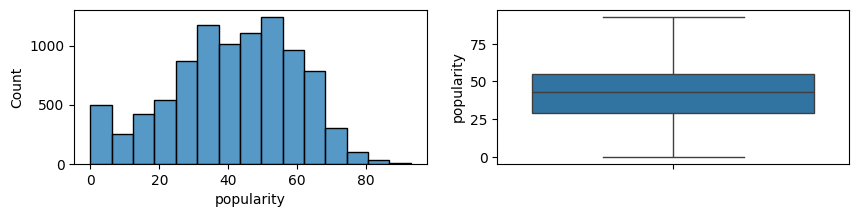

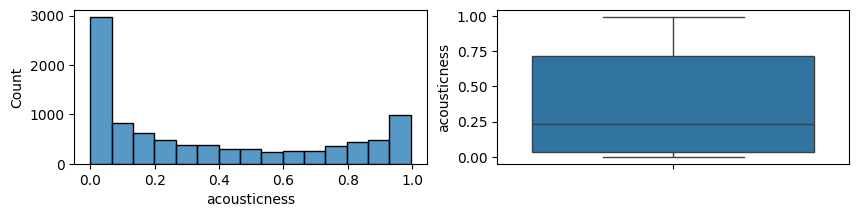

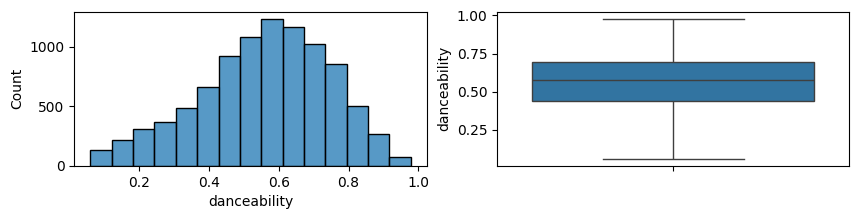

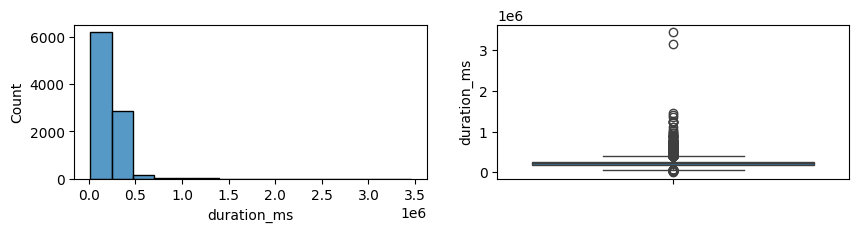

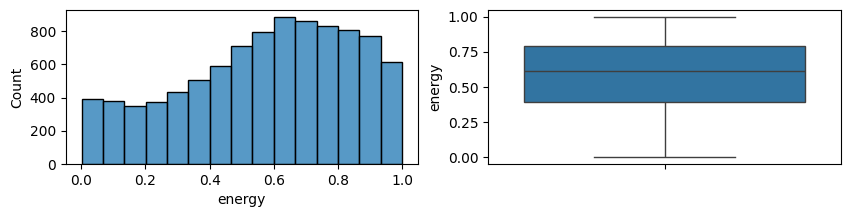

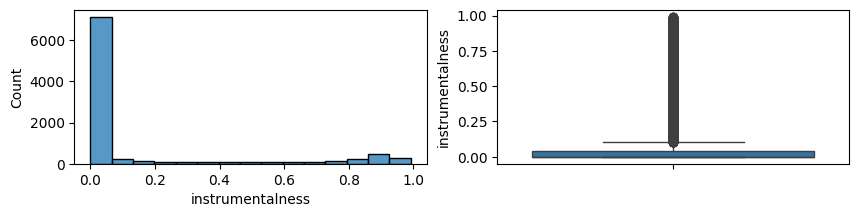

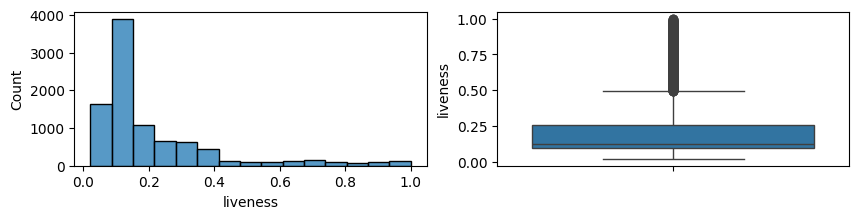

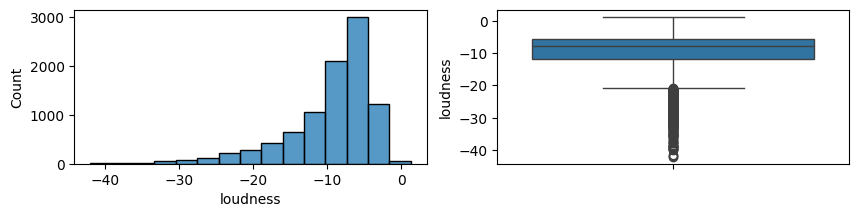

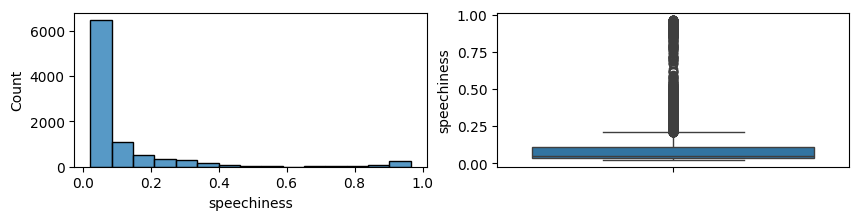

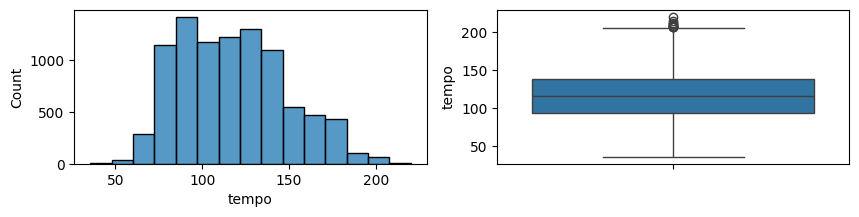

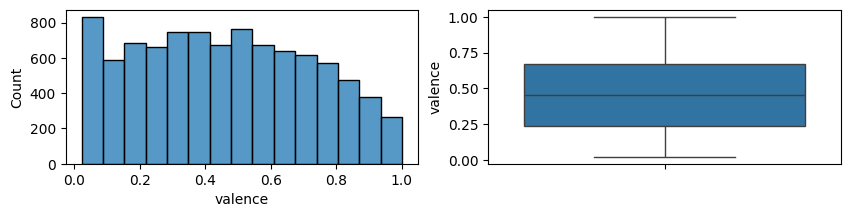

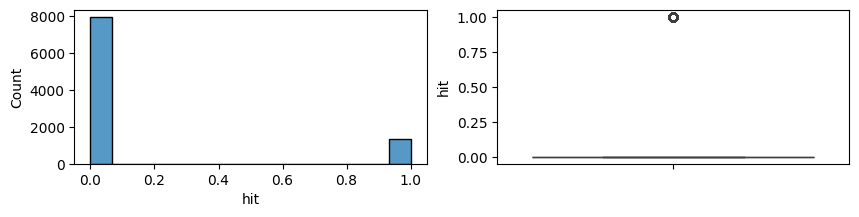

In [ ]:
def check_dist(data, column):
    for i in column:
        plt.figure(figsize=(10,2))
        plt.subplot(1,2,1)
        sns.histplot(data[i], bins=15)

        plt.subplot(1,2,2)
        sns.boxplot(y=data[i])
        plt.show()

check_dist(data[numerical], numerical)

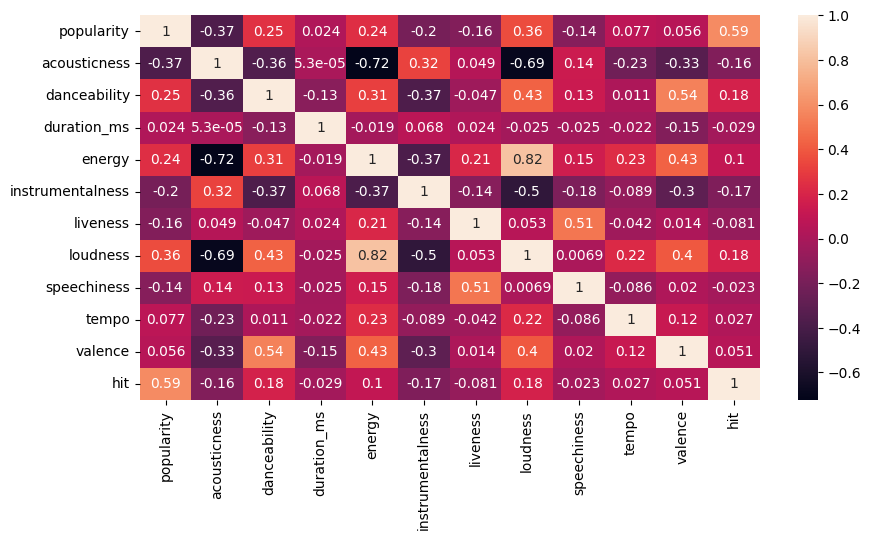

In [ ]:
#Correlation map
correlation_matrix = data[numerical].corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# R^2, MAE, RMSE of The Dataset

Popularity as target

In [ ]:
features = ['danceability', 'energy', 'loudness']
target = 'popularity'

In [ ]:
X = data[numerical + categorical]
y = data[target]

In [ ]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

In [ ]:
X_transformed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('R^2 =', r2)
print('MAE =', mae)
print('RMSE =', rmse)

R^2 = 0.9999996009494969
MAE = 0.00866058474685475
RMSE = 0.011448603733194151


# Model Improvement

In [ ]:
features = ['danceability', 'energy', 'loudness']
target = 'hit'

In [ ]:
x = data[features]
y = data[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Regression (Additional)

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [ ]:
print("Random Forest Regressor:")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.4f}")
print(f"R^2: {r2_score(y_test, y_pred_rf):.4f}\n")

Random Forest Regressor:
MSE: 0.1196
R^2: 0.0171



In [ ]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(x_train, y_train)
y_pred_gbr = gbr.predict(x_test)

In [ ]:
print("Gradient Boosting Regressor:")
print(f"MSE: {mean_squared_error(y_test, y_pred_gbr):.4f}")
print(f"R^2: {r2_score(y_test, y_pred_gbr):.4f}")

Gradient Boosting Regressor:
MSE: 0.1137
R^2: 0.0653


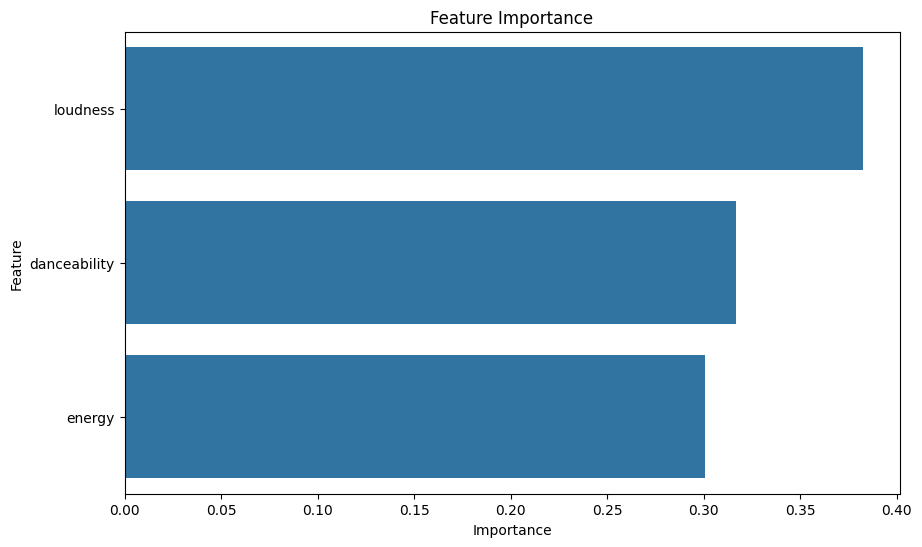

In [ ]:
importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

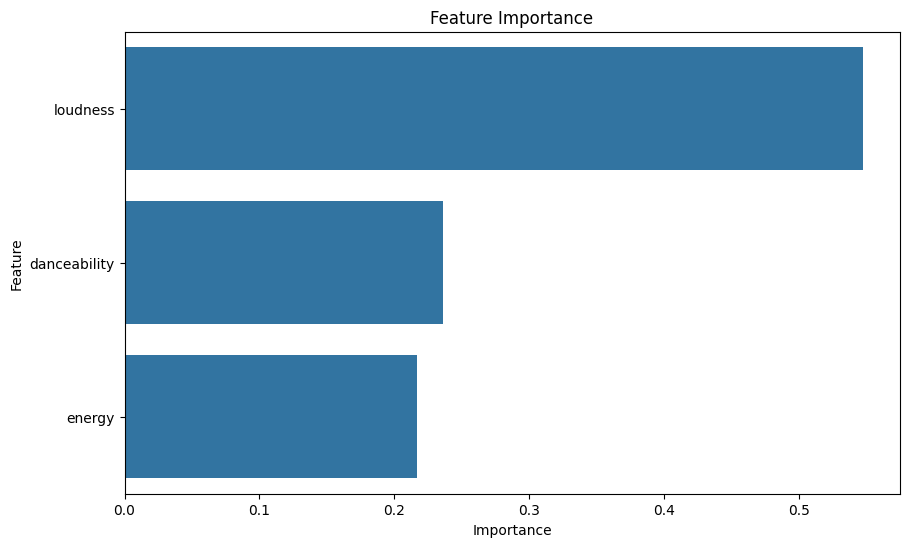

In [ ]:
importances = gbr.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

cv = 5
rf_cv_scores = cross_val_score(rf, x, y, cv=cv, scoring='r2')
gbr_cv_scores = cross_val_score(gbr, x, y, cv=cv, scoring='r2')

In [ ]:
print("\nCross-Validation Results:")
print(f"Random Forest Regressor R^2 (mean): {np.mean(rf_cv_scores):.4f} (+/- {np.std(rf_cv_scores):.4f})")
print(f"Gradient Boosting Regressor R^2 (mean): {np.mean(gbr_cv_scores):.4f} (+/- {np.std(gbr_cv_scores):.4f})")


Cross-Validation Results:
Random Forest Regressor R^2 (mean): 0.0223 (+/- 0.0171)
Gradient Boosting Regressor R^2 (mean): 0.0632 (+/- 0.0062)


In [ ]:
def plot_learning_curve(estimator, title, x, y, cv=None):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x, y, cv=cv, scoring='r2', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("R^2 Score")

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

    plt.legend(loc="best")
    plt.grid()
    plt.show()

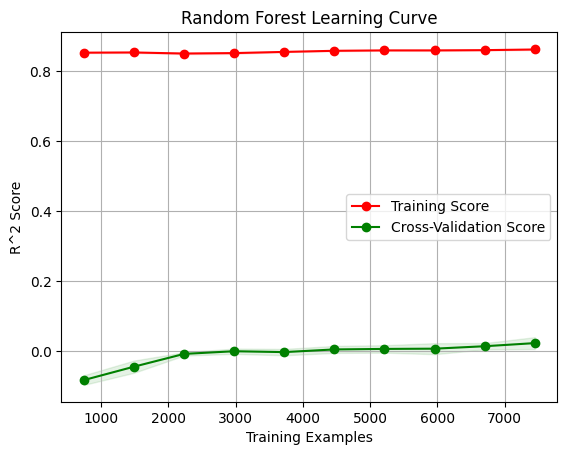

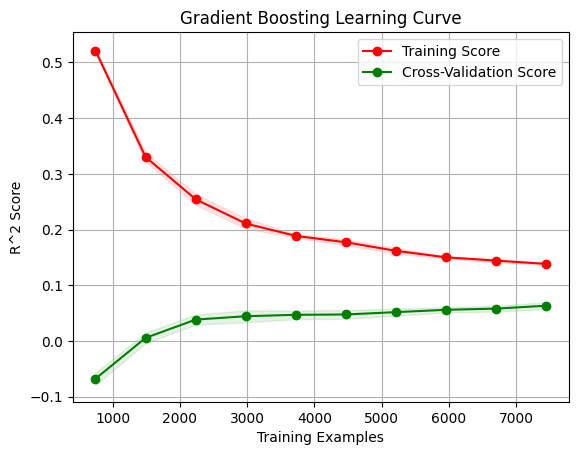

In [ ]:
from sklearn.model_selection import learning_curve
plot_learning_curve(rf, "Random Forest Learning Curve", x, y, cv=cv)
plot_learning_curve(gbr, "Gradient Boosting Learning Curve", x, y, cv=cv)

In [ ]:
print("\nPermutation Importance for Random Forest:")
rf_importance = permutation_importance(rf, x_test, y_test, scoring='r2')
for i in np.argsort(rf_importance.importances_mean)[::-1]:
    print(f"{features[i]}: {rf_importance.importances_mean[i]:.4f}")

print("\nPermutation Importance for Gradient Boosting:")
gbr_importance = permutation_importance(gbr, x_test, y_test, scoring='r2')
for i in np.argsort(gbr_importance.importances_mean)[::-1]:
    print(f"{features[i]}: {gbr_importance.importances_mean[i]:.4f}")


Permutation Importance for Random Forest:
loudness: 0.1891
energy: 0.1314
danceability: 0.0686

Permutation Importance for Gradient Boosting:
loudness: 0.1128
energy: 0.0495
danceability: 0.0235


In [ ]:
# Error Analysis
rf_errors = y_test - y_pred_rf
gbr_errors = y_test - y_pred_gbr

# Analyze Error Patterns
print("\nRandom Forest Error Analysis:")
error_df_rf = pd.DataFrame({'True': y_test, 'Predicted': y_pred_rf, 'Error': rf_errors})
print(error_df_rf.describe())


Random Forest Error Analysis:
              True    Predicted        Error
count  1862.000000  1862.000000  1862.000000
mean      0.141783     0.156936    -0.015153
std       0.348921     0.163462     0.345593
min       0.000000     0.000000    -0.910000
25%       0.000000     0.020000    -0.190000
50%       0.000000     0.110000    -0.060000
75%       0.000000     0.240000     0.000000
max       1.000000     0.910000     1.000000


In [ ]:
print("\nGradient Boosting Error Analysis:")
error_df_gbr = pd.DataFrame({'True': y_test, 'Predicted': y_pred_gbr, 'Error': gbr_errors})
print(error_df_gbr.describe())


Gradient Boosting Error Analysis:
              True    Predicted        Error
count  1862.000000  1862.000000  1862.000000
mean      0.141783     0.145841    -0.004058
std       0.348921     0.100621     0.337321
min       0.000000    -0.043743    -0.744423
25%       0.000000     0.062185    -0.190120
50%       0.000000     0.144048    -0.108203
75%       0.000000     0.210910    -0.017716
max       1.000000     0.744423     0.999020


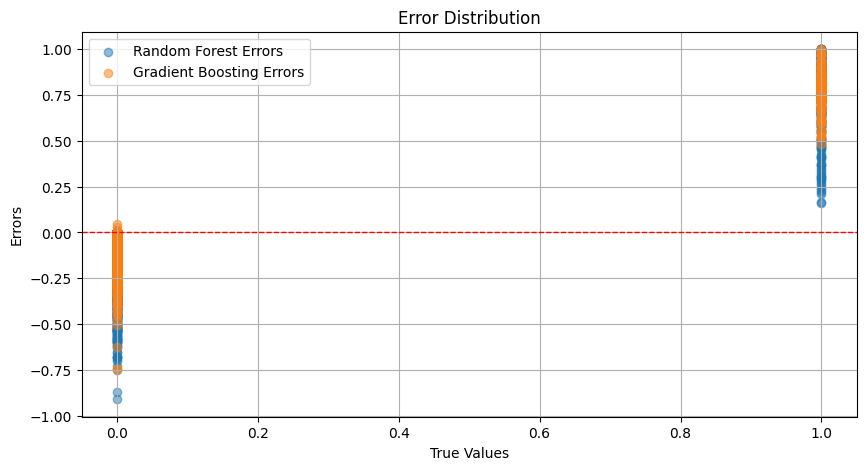

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, rf_errors, alpha=0.5, label="Random Forest Errors")
plt.scatter(y_test, gbr_errors, alpha=0.5, label="Gradient Boosting Errors")
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("True Values")
plt.ylabel("Errors")
plt.legend()
plt.title("Error Distribution")
plt.grid()
plt.show()

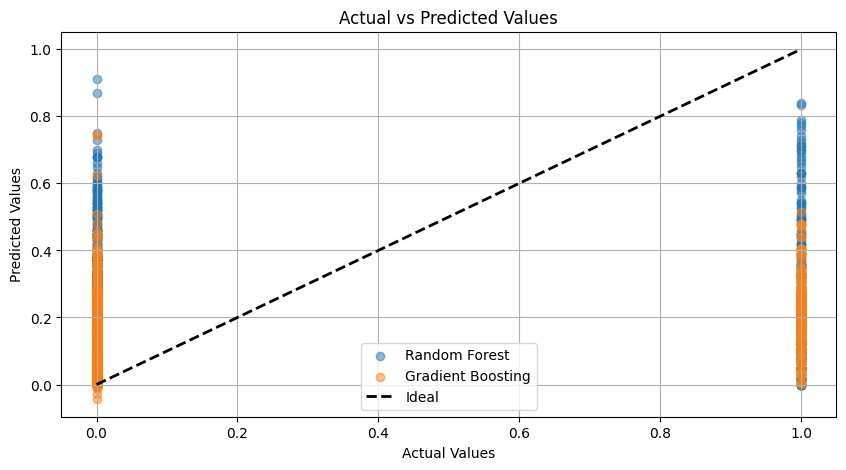

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label="Random Forest")
plt.scatter(y_test, y_pred_gbr, alpha=0.5, label="Gradient Boosting")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Actual vs Predicted Values")
plt.grid()
plt.show()

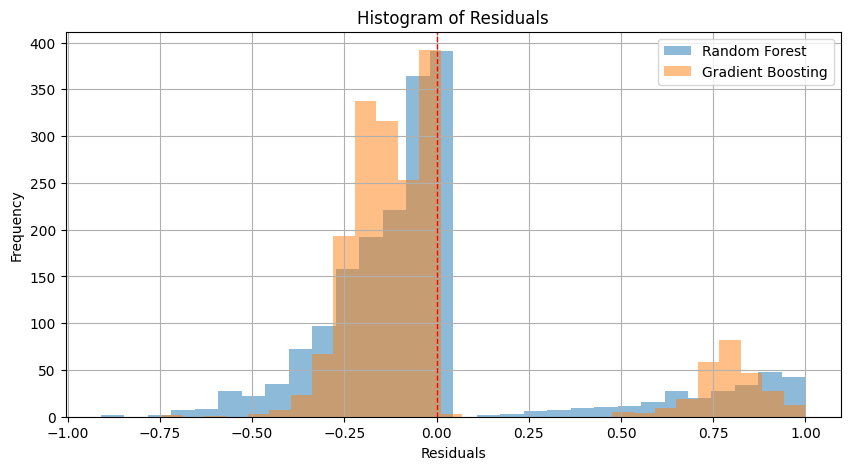

In [ ]:
# Residuals Histogram
plt.figure(figsize=(10, 5))
plt.hist(rf_errors, bins=30, alpha=0.5, label="Random Forest")
plt.hist(gbr_errors, bins=30, alpha=0.5, label="Gradient Boosting")
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.title("Histogram of Residuals")
plt.grid()
plt.show()

## Classification (AOL & Included on poster)

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1598
           1       0.45      0.11      0.18       264

    accuracy                           0.85      1862
   macro avg       0.66      0.55      0.55      1862
weighted avg       0.81      0.85      0.82      1862



In [ ]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1598
           1       0.20      0.00      0.01       264

    accuracy                           0.86      1862
   macro avg       0.53      0.50      0.47      1862
weighted avg       0.77      0.86      0.79      1862



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

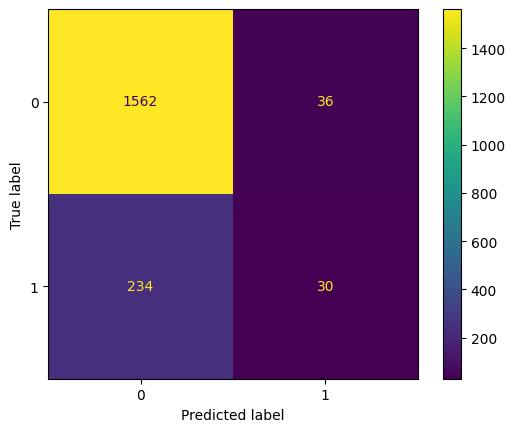

In [ ]:
cm = confusion_matrix(y_test,y_pred_rf,labels = [0,1])
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)
cm_plot.plot()

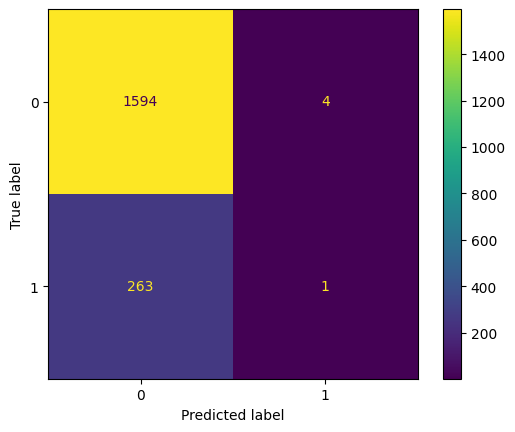

In [ ]:
cm = confusion_matrix(y_test,y_pred_gb,labels = [0,1])
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gb.classes_)
cm_plot.plot()

### Hyperparameter tuning

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 10, 20],
}
rf = RandomForestClassifier()
rf_search = RandomizedSearchCV(rf, param_grid, cv=5)
rf_search.fit(x_train, y_train)
print("Best parameters:", rf_search.best_params_)

Best parameters: {'n_estimators': 300, 'min_samples_split': 20, 'max_depth': 3}


In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=20,
    max_depth=7,
    random_state=42
)

rf_model.fit(x_train, y_train)
y_prob = rf_model.predict_proba(x_test)[:, 1]
threshold = 0.3
y_pred_rf = (y_prob > threshold).astype(int)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1598
           1       0.33      0.05      0.09       264

    accuracy                           0.85      1862
   macro avg       0.59      0.52      0.50      1862
weighted avg       0.79      0.85      0.80      1862



In [ ]:
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10, 15],
    'subsample': [0.8, 0.9, 1.0],
}
gb_model = GradientBoostingClassifier()
random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=1)
random_search.fit(x_train, y_train)
print("Best parameters found by RandomizedSearchCV: ", random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found by RandomizedSearchCV:  {'subsample': 0.9, 'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 9, 'learning_rate': 0.01}


In [ ]:
gb_model = GradientBoostingClassifier(
    subsample=1.0,
    n_estimators=400,
    min_samples_split=5,
    max_depth=5,
    learning_rate=0.05,
    random_state=42
)
gb_model.fit(x_train, y_train, sample_weight=(y_train == 1) * 10 + (y_train == 0) * 1)
# gb_model.fit(x_train, y_train)
y_pred_gb = gb_model.predict(x_test)
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.93      0.59      0.72      1598
           1       0.22      0.71      0.34       264

    accuracy                           0.61      1862
   macro avg       0.57      0.65      0.53      1862
weighted avg       0.83      0.61      0.67      1862



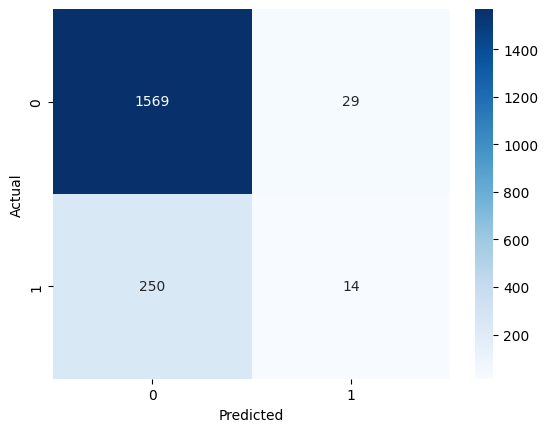

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

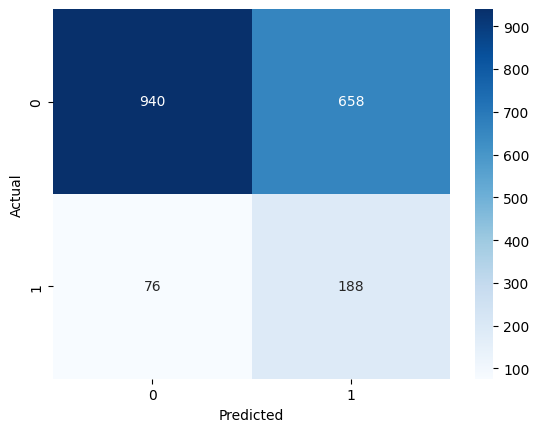

In [ ]:
cm = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Cross validation

In [ ]:
scores = cross_val_score(rf, x_train, y_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")

Cross-validation scores: [0.85033557 0.84899329 0.85426461 0.84754869 0.85829416]
Average cross-validation score: 0.8518872627455929


In [ ]:
scores = cross_val_score(gb, x_train, y_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")

Cross-validation scores: [0.84899329 0.84899329 0.85157824 0.85023506 0.85157824]
Average cross-validation score: 0.8502756230252275


### Feature Importances

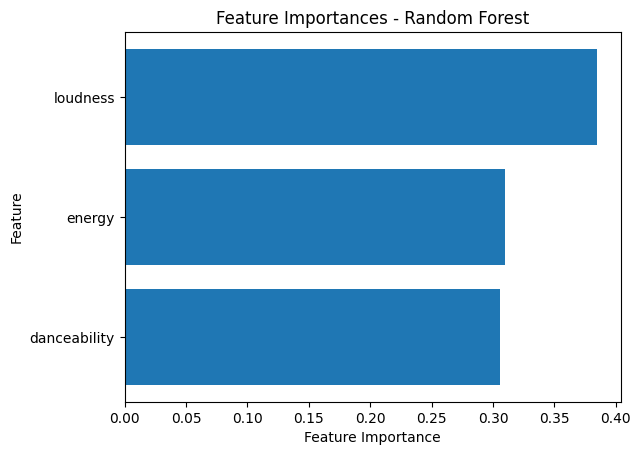

In [ ]:
feature_importances = rf_model.feature_importances_
features = x_train.columns
sorted_idx = np.argsort(feature_importances)

plt.barh(features[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances - Random Forest")
plt.show()

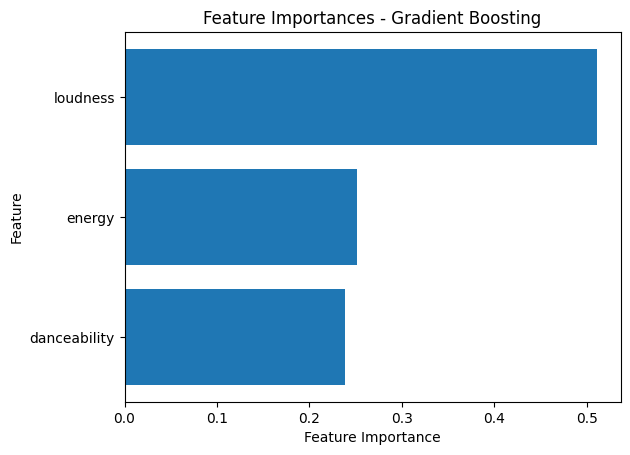

In [ ]:
feature_importances = gb_model.feature_importances_
features = x_train.columns
sorted_idx = np.argsort(feature_importances)

plt.barh(features[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances - Gradient Boosting")
plt.show()

### Learning Curve

In [ ]:
def plot_learning_curve(model, X_train, y_train, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    )

    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    test_std = test_scores.std(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
    plt.plot(train_sizes, test_mean, label="Test Accuracy", color="red")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="red", alpha=0.2)

    plt.title(title)
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

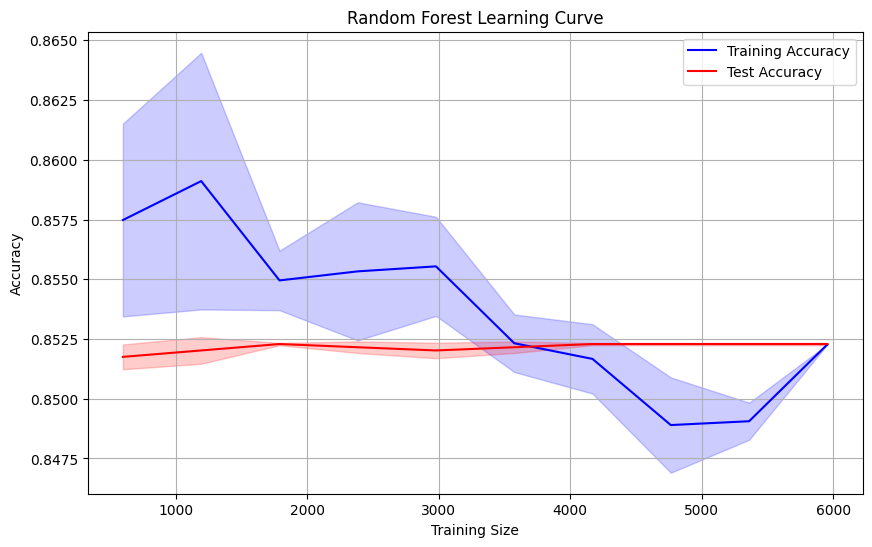

In [ ]:
plot_learning_curve(rf_model, x_train, y_train, title="Random Forest Learning Curve")

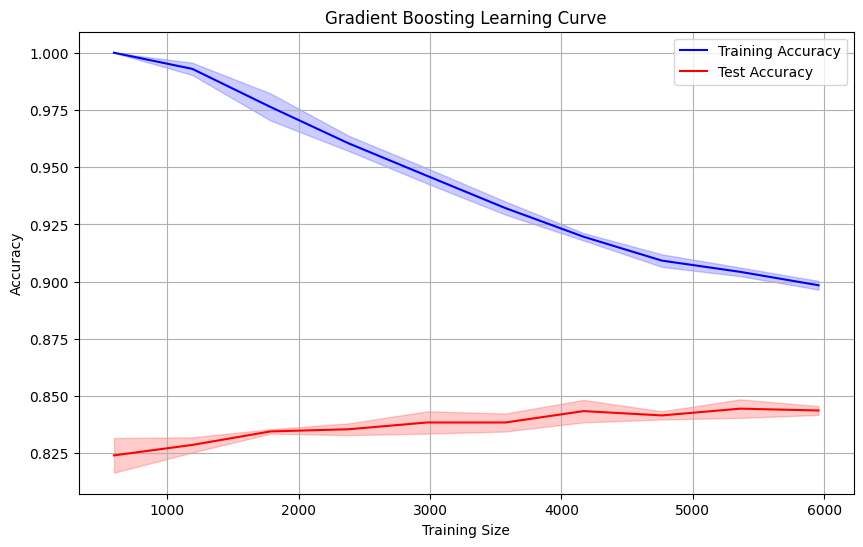

In [ ]:
plot_learning_curve(gb_model, x_train, y_train, title="Gradient Boosting Learning Curve")